## chapter04. 모델훈련

### 4.1.선형회귀

<**모델을 훈련시키는 방법** ex. 선형회귀>
1. 직접 계산할 수 있는 공식을 사용하여 훈련셋에 가장 잘 맞는 모델 파라미터를 선정
2. 경사하강법으로 최적화하는 방법

4.1.1.정규방정식

In [57]:
#무작위로 생성한 선형 데이터셋
import numpy as np
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [58]:
#정규방정식으로 theta값을 구한다.
X_b=np.c_[np.ones((100,1)),X] #모든 샘플에 x0=1을 추가한다"

In [59]:
X_b

array([[1.        , 1.55429383],
       [1.        , 1.1168085 ],
       [1.        , 0.84844402],
       [1.        , 1.81270877],
       [1.        , 0.22239496],
       [1.        , 0.98525021],
       [1.        , 0.02270729],
       [1.        , 0.93732128],
       [1.        , 0.11260655],
       [1.        , 0.23763583],
       [1.        , 0.23505249],
       [1.        , 1.2984206 ],
       [1.        , 1.49208976],
       [1.        , 1.16673753],
       [1.        , 1.9243451 ],
       [1.        , 0.74974116],
       [1.        , 0.57142417],
       [1.        , 1.73719826],
       [1.        , 0.44719168],
       [1.        , 1.92644508],
       [1.        , 0.02430895],
       [1.        , 1.93975765],
       [1.        , 0.08631982],
       [1.        , 1.78228623],
       [1.        , 1.05540222],
       [1.        , 1.98592959],
       [1.        , 0.14759313],
       [1.        , 1.10770857],
       [1.        , 1.93860507],
       [1.        , 1.04619569],
       [1.

In [60]:
#best theta값을 구한다. 
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.94308905],
       [2.99512231]])

In [61]:
#thetahat으로 모델 예측을 시행하는 경우
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] #모든 샘플에 x0=1을 추가한다. 

y_predict=X_new_b.dot(theta_best)
y_predict

array([[3.94308905],
       [9.93333367]])

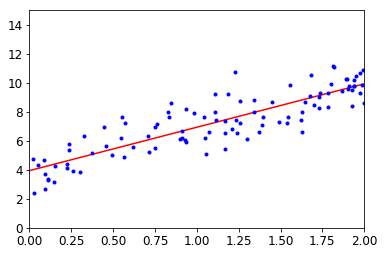

In [62]:
#모델 예측의 결과를 시각화 
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

동일한 작업을 sklearn으로도 가능하다. 단, 앞에서 python wrapper로 시행한 결과는 식제 공식에 대입한 결과이나, sklearn wrapper로 시행한 결과는 미리 API가 제공되는 바이다. (참고)
```python
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)  #선형회귀로 학습
lin_reg.intercept_,lin_reg.coef_ #intercept와 coef를 구하는 API
lin_reg.predict(X_new)
```

4.1.2. 계산복잡도 <br>
시간복잡도, 공간복잡도 - 연산횟수- bigO

### 4.2.경사하강법
기본 아이디어는 비용함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 방식을 의미한다 <br>
1. learning rate<br>
-learning rate a가 크면 적절한 optimizer를 찾기가 어려움 <br>
-learning rate a가 작으면 성능이 떨어진다 . <br>
<br>
2. derivitive (데이터를 어떻게 사용하느냐에 따라 종류가 달라짐)<br>
-배치경사하강법<br>
-확률적 경사 하강법<br>
-미니배치 경사 하강법<br>

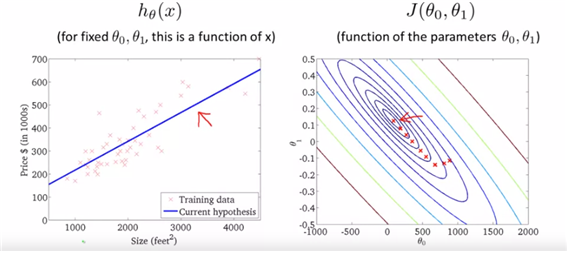

4.2.1. 배치 경사 하강법 : derivitive term의 값에 대한 설명, 전체 데이터를 모두 훈련데이터로 사용한다. 

In [63]:
#편도함수의 식 구현
eta=0.1 #학습율
n_iterations=1000
m=100

theta=np.random.randn(2,1) #theta값을 무작위로 초기화 

for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

In [64]:
#theta확인
theta #경사하강법이 완벽하게 작동됨을 알 수가 있다. 

array([[3.94308905],
       [2.99512231]])

4.2.2. 확률적 경사하강법, 하나의 샘플만을 훈련데이터로 사용한다. 

확률적 경사하강법은 매 스탭에서 한개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산하는 방식을 의미한다. 

In [65]:
#간단한 학습스케쥴의 구현
#처음에는 learning rate를 크게, 나중에는 작게하여 최솟값에 잘 수렴하도록 하는 것을 의미한다. 
n_epochs=50
t0, t1 = 5,50 #학습스케쥴의 하이퍼파라미터

def learning_schedule(t): #학습스케쥴
    return t0 / (t+t1)
theta= np.random.randn(2,1) #theta값을 무작위로 초기화 한다. 

for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1] #임의의 하나의 샘츨 확인
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi) #gradient 부분 계산
        eta=learning_schedule(epoch*m+i) #학습스케쥴로 learning rate초기화 
        theta=theta-eta*gradients #theta값 확인

In [66]:
theta

array([[3.91784249],
       [2.95879687]])

그렇다면 선형함수마다 어떤 gradients를 사용하여 optimized theta를 구하는지는 다르다고 할 수가 있다. 앞에서는 python wrapper을 이용하여 공식을 그대로 작성하였지만, sklearn wrapper을 사용하면 API가 제공된다. 

In [67]:
#SDG의 경우는 하나의 샘플링값에 대해 학습스케쥴을 적용하면서 theta값을 결정한다. 
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [68]:
#정규방정식에서 구한 것과 비슷한 값을 구할 수가 있다. 
sgd_reg.intercept_, sgd_reg.coef_

(array([3.92145451]), array([2.97031249]))

4.2.3. 미니배치 경사 하강법

미니배치는 배치와 확률적 방법의 중간에 있는 방법으로, 임의의 작은 샘플 셋에 대해 gradient를 계산한다.

### 4.3. 다항회귀
확장된 특성은 포함한 데이터셋에 선형모델을 훈련시킨다. 

In [69]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [70]:
#2차식 형태의 다항식 선언
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

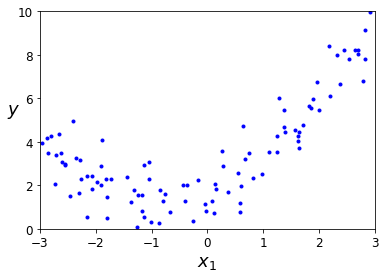

In [71]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [72]:
#다항식 값을 만든다 
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X) 
X[0] 
X_poly[0] 

#참고로 이 PolynomialFeatures는 주어친 차수의 특성 간의 모든 교차항도 식에 포함해준다. 

array([-0.75275929,  0.56664654])

In [73]:
#다항식, 원래 x를 linear에 적용한다. 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

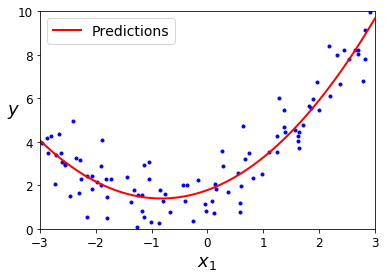

In [74]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

### 4.4. 학습곡선
데이터에 대하여 **모델이 과대적합 또는 과소적합 되었는지**를 알 수 있는 방법을 제시.

1. **교차검증** (cross_val_score)<br>
-단순히 데이터를 모델에 훈련했을 때의 정확도와 cross_val_score시의 정확도 평균을 비교하여 과대적합인지를 판단했었음(113p) <br>
-훈련데이터에서 성능이 좋지만 교차검증 점수가 좋지 않다면 모델은 과대적합되었다. <br>
-만약 양쪽 모두 좋지 않으면 과소적합이다. <br>

2. **학습곡선**<br>
-훈련세트와 검증세트의 모델성능을 훈련세트 크기의 함수로 나타내는 방법을 의미한다.<br>
-훈련세트를 여러개의 서브셋으로 나누어 반복훈련하도록 하는 식을 만들면 된다. 

In [75]:
#훈련 셋의 크기에 따른 서브셋에 따른 RMSE를 반복해서 구한후 리스트에 append하는 과정 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

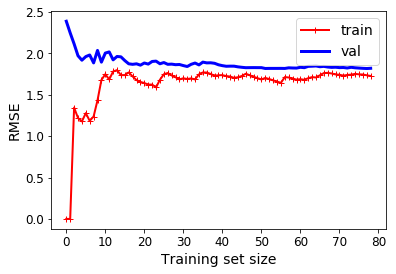

In [76]:
#단순선형 회귀 모델의 학습곡선 시각화 
lin_reg=LinearRegression()
plot_learning_curves(lin_reg, X,y)

훈련셋은 하나 혹은 2개 정도의 샘플이 있을 때는 완벽하게 작동한다. 하지만 샘플이 추가되면서 노이즈도 추가되고 비선형이기 때문에 오차가 급수적으로 증가한다. 따라서 곡선이 어느정도 평탄해 질 때까지 오차는 계속 증가한다<br>
<br>
이 학습곡선이 **과소적합모델**의 전형적인 모습이다. 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 근접해 있기 때문이다. 

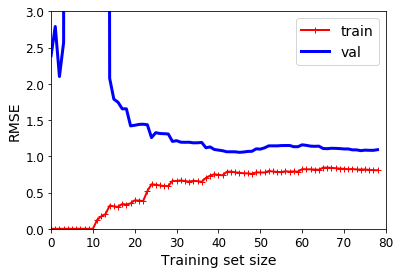

In [77]:
#10차 다항회귀 모델의 학습곡선을 그리는 경우
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])            
plt.show()                       

- 훈련데이터의 오차가 선형회귀 모델보다 훨씬 낮다
- 두 곡선 사이에 공간이 있다. 즉 **훈련데이터에서의 성능이 검증데이터에서의 성능보다 훨씬 낫다는 의미이므로 과대적합**, 하지만 샘플의 수를 계속 추가하면 하나의 값으로 수렴될 수 있을 것이라는 생각을 할 수가 있다. 즉 과대적합 문제를 해결하는 한가지의 방법은 검증오차가 훈련오차에 근접할 때까지 더 많은 훈련 데이터를 추가하는 것입니다. 

## 4.5. 규제가 있는 선형모델
과대적합을 감소시키는 가장 좋은 방법은 **모델을 규제하는 것**이다. **자유도를 줄이면 데이터에 과대적합되기 더 어려워지기 때문**이다. 선형회귀 모델에서는 보통 모델의 **가중치를 제한함**으로써 규제를 가한다. <br>
여기서의 규제는 비용함수 j(theta)에서만 적용되는 바이다. 

### 4.1. 릿지 회귀
릿지회귀는 **규제가 추가된 선형회귀의 버전**이다. 규제항이 비용함수에 추가된 형태를 의미한다. 아는 학습 알고리즘을 데이터에 맞추는것 뿐만 아니라 모델의 가중치가 가능한한 작게 유지되도록 노력한다. <br>
또한 릿지회귀는 입력특성의 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요합니다. <br>
결국 선형회귀에서 '규제항'이 추가되었을 뿐 다른 바가 추가된 것은 아니다. theta를 구하는 방법에서 **정규방정식**을 이용하거나 **경사하강법**을 이용하는 것에는 차이가 없다는 말이다. 

In [79]:
#sklearn에서 정규방정식을 사용한 릿지회귀를 적용
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1, solver='cholesky') #릿지 객체 생성
ridge_reg.fit(X,y) #데이터에 대해 학습
ridge_reg.predict([[1.5]]) #1.5를 x라고 햇을 때의 예측값

array([[4.82497007]])

In [83]:
#확률적 경사하강방법을 사용하되 규제를 준다. penalty='l2'
import warnings
warnings.filterwarnings('ignore')

sgd_reg=SGDRegressor(max_iter=5, penalty='l2') #l2는 비용함수 가중치 벡터의 제곱을 2로 나눈 값 즉 ridge를 그대로 의미한다. 
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([3.80186964])

### 4.5.2.라쏘회귀
선형회귀의 또 다른 규제버전에 해당한다. 릿지회귀처럼 함수에 규제항을 더하지만, l의 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 노름을 사용한다. 라쏘의 가장 중요한 특징은 **덜 중요한 특성의 가중치를 완전히 제거**하고자 하는 것이다. <br>
덜 중요한 특성에 있어서는 cost function을 최소로 하려는 것이기 때문이다. 

라쏘에서는 그래디언트 함수를 사용하는 대신에 서브그래디언트 벡터를 사용한다. 

In [84]:
#lasso
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.77621741])

### 4.5.3. 엘라스틱넷
엘라스틱넷은 릿지회귀와 라쏘회귀를 절충한 모델이다. 규제항은 릿지와 라쏘의 규제항을 단순히 더해서 사용하며 혼합정도는 혼합비율 r을 사용하여 조절해 줍니다. r=0이면 엘라스틱넷은 릿지회귀와 같고 r=1이면 라쏘 회귀와 같다. 

- 일반적으로 평범한 선형회귀는 피해야 합니다. 
- 릿지가 기본이 되지만 실제로 쓰이는 특성이 몇 개 뿐이라고 의심이 된다면 라쏘나 엘라스틱이 낫다. 
- 이 모델들은 불필요한 특성의 가중치를 0으로 만들어 준다. 
- 특성 수가 훈련샘플 수보다 많거나 몇 개가 강하게 연관되어 있을 때는 라쏘가 문제를 일으키기도 하므로 엘라스틱을 선호한다. 

In [85]:
#sklearn API를 사용한 ElasticNet
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1, l1_ratio=0.5) #a와 r의 값을 지정하여 엘라스틱넷 객체를 지정
elastic_net.fit(X,y) #학습
elastic_net.predict([[1.5]]) #예측

array([4.78114505])

### 4.5.4. 조기종료
경사하강법이다. 앙상블과 같이 여러번의 반복을 통해 구현하는 경우에 반복적인 학습 알고리즘을 규제하는 가장 색다른 방식은 **검증에러가 최솟값에 도달하면 훈련을 중지**하는 것이다. <br>
혹은 경사면이 매끄럽지 않아 최솟값에 도달했는지를 확인하기 힘든 경우에는 직전의 파라미터와 비교하여 성능이 향상되었는지를 비교하면 된다 

```python
#조기종료
from sklearn.base import clone

#데이터 준비 
poly_scaler=Pipeline([
    ('poly_feaures', PolynomialFeatures(degree=90, include_bias=False)), #다항식 생성
    ('std_scaler', StandardScaler()) ]) #feature scalling
X_train_poly_scaled=poly_scaler.fit(X_train) #학습
X_val_poly_scaled=poly_scaler.transform(X_val)

minimun_val_error=float('inf')
best_epoch=None #이후에 반환할 loss가 가장 적은 반복수와 모델을 NULL로 지정
best_model=None

for epoch in range(1000): #반복의 횟수
    sgd_reg.fit(X_train_poly_scaled, y_train) #훈련을 이어서 진행한다. 
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    val_error=mean_squared_error(y_val, y_val_predict)
    if val_error <minimum_val_error:
        minumum_val_error-val_error
        best_epoch=epoch
        best_model=clone(sgd_reg)
```

### 4.6. 분류작업에서 사용하는 로지스틱 회귀와 소프트맥스 함수
로지스틱은 선형회귀와 같이 입력특성의 가중치의 합을 계산하여 반환값을 만든다. 대신 선형회귀처럼 바로 값을 뱉어내는 것이 아니라 결괏값의 로지스틱을 출력한다. 로지스틱(logit)은 시그모이드 함수라고 생각하면 된다. 

#### 4.6.1. 확률의 추정
로지스틱 회귀 모델의 확률추정식(188p)의 경우는 로지스틱 식(로짓식)에 theta.T*x값을 집어넣어 해당 입력값에 대한 해당 시그모이드값을 출력하게 만들어주는 회귀 식이다. 

#### 4.6.2. 훈련과 비용함수 
훈련의 목적은 양성샘플(1)에 대해서는 높은 확률로 추정하고 음성샘플(y=0)에 대해서는 낮은 확률로 추정하는 모델의 파라미터 벡터 theta를 찾는 과정이다. 이를 '하나의 훈련샘플'에 대한 비용함수로 담아 로그식을 사용하여 표현이 가능하고 , <br>
전체 비용함수에 대해서는 모든 훈련샘플이 비용을 평균한 값이라고 생각하면 된다. 이를 **로그손실**이라고 한다. 로그손실값에 대해 min 값을 구하는 방법은 아직 없지만, 경사하강법이 전역 최솟값을 찾는 것은 보장한다. 

#### 4.6.3. 결정경계

In [89]:
#데이터 로드
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [90]:
X=iris['data'][:,3:] #꽃잎의 너비
y=(iris['target']==2).astype(np.int) #iris_verginica이면 1, 아니면 0

In [91]:
#로지스틱 훈련
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(solver='liblinear') #로지스틱 객체의 생성
log_reg.fit(X,y) #학습

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
#모델의 추정확률 계산
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new) #0,1이 나올 확률을 확률값으로 표시
y_proba

array([[0.98554411, 0.01445589],
       [0.98543168, 0.01456832],
       [0.98531838, 0.01468162],
       ...,
       [0.02618938, 0.97381062],
       [0.02598963, 0.97401037],
       [0.02579136, 0.97420864]])

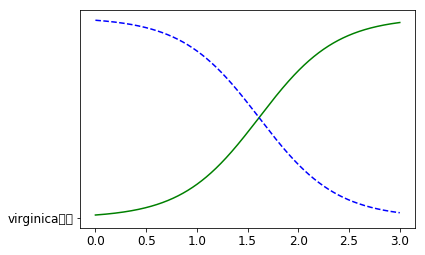

In [96]:
plt.plot(X_new, y_proba[:,1], 'g-','virginica맞음')
plt.plot(X_new, y_proba[:,0], 'b--', label='virginica아님')

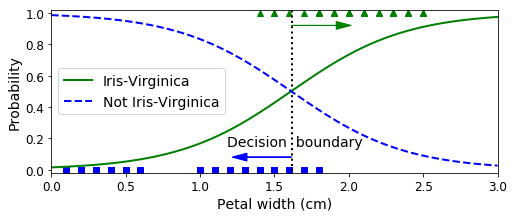

In [99]:
#시각화
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()
#정해지는 경계기 1.6정도 되므로 predict_proba가 아니라 predict()를 통해 예측한다면 결정경계는 1.6정도가 될 것이다. 

데이터셋을 두개의 열을 기준으로 분류도 가능하며, 이 경우에는 구분선이 직선이 되어있다. (두 feature을 경계로 나눠주는 부분이므로) 또한 다른 선형모델처럼 로지스티도 l1, l2패널티를 이용하여 규제가 가능하다. 여기서 l2패널티가 기본이다. <br>
또한 logistic에서의 규제 강도를 조절하는 hyper parameter는 alpha가 아니라 C값이다. 

#### 4.6.4.소프트맥스 회귀
로지스틱회귀는 이진분류기였다면, **직.접. 다중 클래스를 지원하도록 일반화**되는 것이 소프트맥스 회귀이다. (로지스틱과 같은 이진분류기를 여러개 중첩하여 다중분류도 가능하기도 하다. ) 이것을 **소프트맥스회귀, 다항로지스틱회귀**라고도 한다. 

샘플 x가 주어지면 먼지 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 s(x)를 계산하고 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정한다. 샘플x에 대해 각 클래스의 점수가 계산이 된다면 소프트맥스 함수를 통과시켜 각 점수가 나올 확률계산이 가능하다. 
또한 로지스틱 분류기과 동일하게 소프트맥스 분류기는 추정확률이 가장 높은 클래스를 선택하여 반환한다. <br>
소프트 맥스는 하나의 레이블이 있을 떄만 (y값이 하나) 적용이 가능하다 

모델이 타깃클래스에 대해서는 높은 확률을 가지고 다른 클래스에 대해서는 낮은 확률을 추정하도록 하는 것이 목적이고, 이때 **엔트로피 비용함수**를 사용한다.(엔트로피 비용함수 = 소프트맥스회귀에서의 비용함수 

이제 비용함수를 알았으니 각 클래스에 대한 그래디언트 벡터 값의 계산이 가능하다. (편미분을 통한다) 따라서 비용함수를 최소화하기 위한 파라미터 행렬을 찾기 위해 경사하강법을 사용할 수 있다. 

In [100]:
#소프트 맥스를 사용하여 붓꽃을 세 종류로 분류하는 경우
X=iris['data'][:,(2,3)]
y=iris['target']

softmax_reg=LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10) #소프트맥스 회귀 객체 생성 , 규제 생성
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
#꽃잎의 길이가 5, 너비가 2인 품종을 발견했다면 어떤 종인가?
softmax_reg.predict([[5,2]])
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

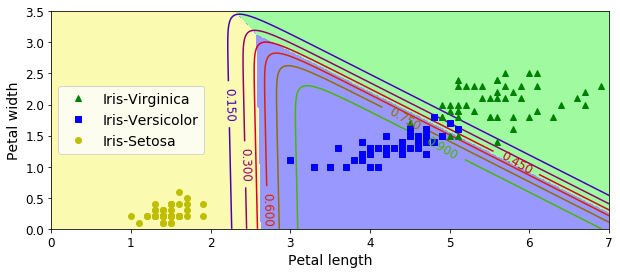

In [104]:
#분류하고자 하는 lable마다의 결정경계에 따라서 시각화한 그래프
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()